In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [ ]:
plt.rc('figure',dpi=100);

In [33]:
anuncios = pd.read_csv("../Data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv")

In [34]:
anuncios_por_area = anuncios['nombre_area'].value_counts()
anuncios_por_area

Ventas                                   1659
Comercial                                 983
Administración                            901
Producción                                821
Programación                              576
Contabilidad                              416
Tecnologia / Sistemas                     388
Atención al Cliente                       347
Mantenimiento                             324
Recursos Humanos                          235
Gastronomia                               234
Oficios y Profesiones                     209
Soporte Técnico                           203
Logística                                 200
Call Center                               191
Almacén / Depósito / Expedición           184
Compras                                   170
Marketing                                 153
Otros                                     153
Administración de Personal                152
Recepcionista                             151
Transporte                        

In [36]:
#filtro por los 5 mas populares.
anuncios_por_area = anuncios_por_area[anuncios_por_area > 234]
anuncios_por_area.head(11)

Ventas                   1659
Comercial                 983
Administración            901
Producción                821
Programación              576
Contabilidad              416
Tecnologia / Sistemas     388
Atención al Cliente       347
Mantenimiento             324
Recursos Humanos          235
Name: nombre_area, dtype: int64

In [40]:
def key_or_other(key):
    keys = ['Ventas', 'Comercial', 'Administración', 'Producción', 'Programación', 'Contabilidad', 'Contabilidad', 'Tecnologia / Sistemas', 'Mantenimiento', 'Recursos Humanos']
    if key in keys:
        return key
    return "Otro"

In [41]:
anuncios['area_pop'] = anuncios['nombre_area'].map(key_or_other)
anuncios.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,area_pop
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,Comercial
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste,Otro
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL,Otro
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A,Otro
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL,Producción


In [46]:
anuncios_filtrados = anuncios[anuncios['area_pop'] != "Otro"]

Text(0,0.5,'Cantidad de anuncios')

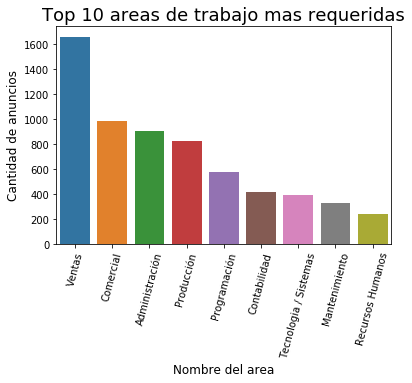

In [94]:
anuncios_por_area = sns.countplot(x='area_pop', data=anuncios_filtrados, order=anuncios_filtrados['area_pop']\
                                 .value_counts().index, orient='v')
anuncios_por_area.set_xticklabels(anuncios_por_area.get_xticklabels(), rotation=75)
anuncios_por_area.set_title("Top 10 areas de trabajo mas requeridas", fontsize =18)
anuncios_por_area.set_xlabel("Nombre del area", fontsize = 12)
anuncios_por_area.set_ylabel("Cantidad de anuncios", fontsize = 12)

In [118]:
grupo = anuncios.groupby("denominacion_empresa", as_index=False).agg({'idaviso':'count'}).sort_values(by='idaviso', ascending=False)

In [119]:
grupo.rename(columns={'idaviso':'cantidad_avisos'}, inplace=True)
grupo.head()

,denominacion_empresa,cantidad_avisos
1944,RANDSTAD,562
1595,Manpower,422
1163,Grupo Gestión,383
201,Assistem,289
2137,SOLUTIX S.A.,260


In [120]:
def rango_avisos(cantidad_avisos):
    if cantidad_avisos < 5:
        return "Menos de 5"
    if cantidad_avisos < 10:
        return "Entre 5 y 10"
    if cantidad_avisos < 20:
        return "Entre 10 y 20"
    if cantidad_avisos < 50:
        return "Entre 20 y 50"
    if cantidad_avisos < 100:
        return "Entre 50 y 100"
    return "Mas de 100"

In [121]:
grupo['rango_avisos'] = grupo['cantidad_avisos'].map(rango_avisos)

In [125]:
grupo = grupo.groupby("rango_avisos").agg({'cantidad_avisos':'sum'}).reset_index()
grupo.head()

,rango_avisos,cantidad_avisos
0,Entre 10 y 20,1374
1,Entre 20 y 50,1990
2,Entre 5 y 10,1348
3,Entre 50 y 100,1514
4,Mas de 100,3945


[Text(0,0,'Menos de 5'),
 Text(0,0,'Entre 5 y 10'),
 Text(0,0,'Entre 10 y 20'),
 Text(0,0,'Entre 20 y 50'),
 Text(0,0,'Entre 50 y 100'),
 Text(0,0,'Mas de 100')]

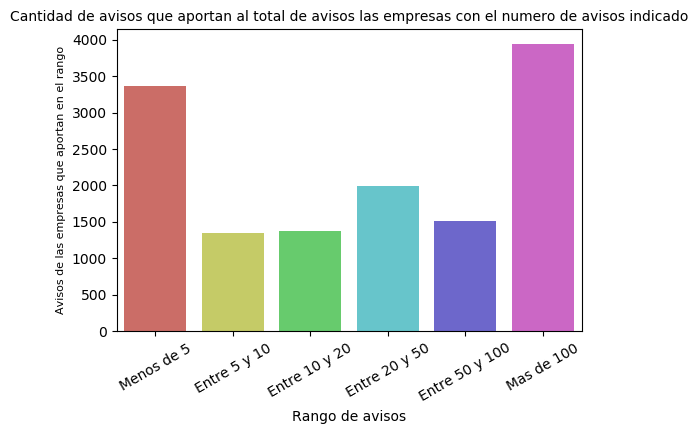

In [145]:
cantidad_anuncios_por_tamanio = sns.barplot(x='rango_avisos', y='cantidad_avisos', data=grupo, order=['Menos de 5', \
        'Entre 5 y 10', 'Entre 10 y 20', 'Entre 20 y 50', 'Entre 50 y 100', 'Mas de 100'], palette='hls')
cantidad_anuncios_por_tamanio.set_title("Cantidad de avisos que aportan al total de avisos las empresas con el numero de avisos indicado", fontsize = 10)
cantidad_anuncios_por_tamanio.set_xlabel("Rango de avisos")
cantidad_anuncios_por_tamanio.set_ylabel("Avisos de las empresas que aportan en el rango", fontsize = 8)
cantidad_anuncios_por_tamanio.set_xticklabels(cantidad_anuncios_por_tamanio.get_xticklabels(), rotation=30)

In [146]:
anuncios['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

Text(0.5,1,'Anuncios por nivel laboral pretendido')

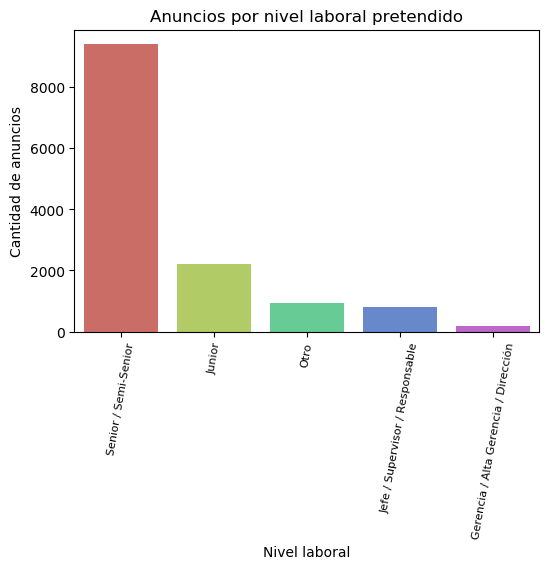

In [156]:
por_nivel_laboral = sns.countplot(x='nivel_laboral', data=anuncios, order=anuncios['nivel_laboral'].value_counts().index, palette='hls')
por_nivel_laboral.set_xlabel('Nivel laboral')
por_nivel_laboral.set_ylabel('Cantidad de anuncios')
por_nivel_laboral.set_xticklabels(por_nivel_laboral.get_xticklabels(), rotation=80, fontsize = 8)
por_nivel_laboral.set_title("Anuncios por nivel laboral pretendido")

In [157]:
postulaciones = pd.read_csv('../Data/datos_navent_fiuba/fiuba_4_postulaciones.csv')

In [158]:
#vamos a ver quienes son los clientes top, cuantos anuncios por area tienen y cuantas postulaciones tienen 
#para esos anuncios
anuncios['denominacion_empresa'].value_counts()

RANDSTAD                                    562
Manpower                                    422
Grupo Gestión                               383
Assistem                                    289
SOLUTIX S.A.                                260
BAYTON                                      238
Pullmen Servicios Empresarios S.A.          229
Adecco - Región NORTE & OESTE GBA           205
Suministra                                  203
Adecco -Región Office                       200
Consultores de Empresas SRL                 197
Complement Group (holding)                  160
Adecco -Región GBA SUR                      160
Kaizen Recursos Humanos                     110
CrossOver                                   109
Adecco  -Región Litoral                     109
IT Resources                                109
Excelencia Laboral S.A.                      98
Suple                                        88
Swiss Medical Group                          88
Aliantec                                

In [160]:
empresas_top=['RANDSTAD', 'Manpower', 'Grupo Gestión', 'Assistem', 'SOLUTIX S.A.', 'BAYTON' ,'Pullmen Servicios Empresarios S.A.' ,'Adecco - Región NORTE & OESTE GBA', 'Suministra','Adecco -Región Office']

In [162]:
def map_empresas_top(empresa):
    if empresa in empresas_top:
        return empresa
    return "Otro"

In [163]:
anuncios['denominacion_empresa'] = anuncios['denominacion_empresa'].map(map_empresas_top)

In [164]:
anuncios = anuncios[anuncios['denominacion_empresa'] != "Otro"]

In [166]:
anuncios['denominacion_empresa'].value_counts()

Manpower                              422
Grupo Gestión                         383
Assistem                              289
BAYTON                                238
Pullmen Servicios Empresarios S.A.    229
Adecco - Región NORTE & OESTE GBA     205
Suministra                            203
Adecco -Región Office                 200
Name: denominacion_empresa, dtype: int64

In [ ]:
top_empresas = sns.countplot(x='denominacion_nombre', )